In [103]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage.filters import threshold_multiotsu
from skimage.color import rgb2hsv, rgb2lab
from glob import glob

%matplotlib widget

(720, 1280, 3)


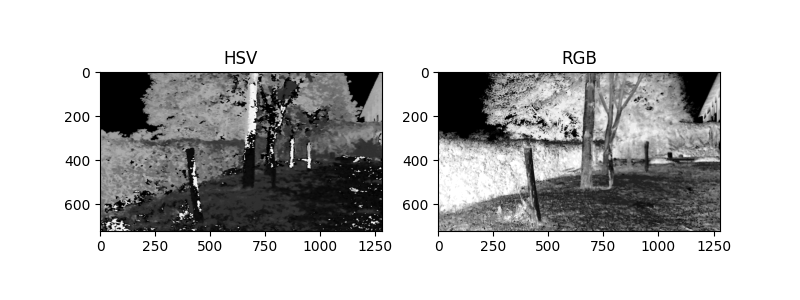

In [72]:
bgr = cv2.imread('trunks/left_2.png')
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
gray = Image.fromarray(gray)
gray = gray.quantize(16)
gray = np.array(gray)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
print(hsv.shape)

plt.close()
plt.figure(figsize=(8,3))
plt.subplot(121), plt.imshow(hsv[:,:,0], 'gray'), plt.title('HSV')
plt.subplot(122), plt.imshow(gray, 'gray'), plt.title('RGB')
plt.show()

In [71]:
cv2.imwrite('quantised.png', gray)

True

In [84]:
hsv_hue = hsv[:,:,0]
thresholds = threshold_multiotsu(hsv_hue)
regions = np.digitize(hsv_hue, bins=thresholds)

#### Image Equalization (Contrast Enhancement)

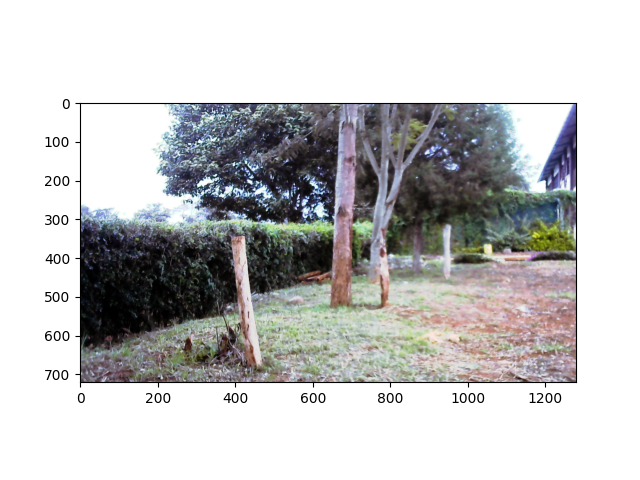

In [87]:
r_image, g_image, b_image = cv2.split(rgb)

r_image_eq = cv2.equalizeHist(r_image)
g_image_eq = cv2.equalizeHist(g_image)
b_image_eq = cv2.equalizeHist(b_image)

image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
cv2.imwrite('quantised.png', image_eq)

plt.figure()
plt.imshow(image_eq, 'gray')
plt.show()

##### Saving Enhanced Images

In [121]:
ims = glob('trunks/*.png')

def save_enhanced(filenames):
    for filename in filenames:
        # read file and convert to rgb
        image = cv2.imread(filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # split image channels
        r_image, g_image, b_image = cv2.split(image)

        # enhance each channel separately
        r_image_eq = cv2.equalizeHist(r_image)
        g_image_eq = cv2.equalizeHist(g_image)
        b_image_eq = cv2.equalizeHist(b_image)
        
        image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))

        new_filename = 'trunks/enhanced/enhanced_' + filename.split('\\')[1]
        cv2.imwrite(new_filename, image_eq)

    print("All images have been saved and enhanced.")